<a href="https://colab.research.google.com/github/EvelynChrisyla/SalesAnalytics/blob/main/SalesAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [250]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

In [251]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
files = [file for file in os.listdir('/content/drive/MyDrive/Python Sesi 3-20231017T144516Z-001/Python Sesi 3/sales-product-data')]

In [253]:
all_months_data =pd.DataFrame()
for file in files:
  data = pd.read_csv("/content/drive/MyDrive/Python Sesi 3-20231017T144516Z-001/Python Sesi 3/sales-product-data/" + file)
  all_months_data = pd.concat([all_months_data,data])

all_months_data.to_csv("all_data.csv",index=False)

# **READ DATA**

In [254]:
sales_data = pd.read_csv('all_data.csv')
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
186846,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
186847,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
186848,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [255]:
#Show first 5 data
print('Head')
sales_data.head()

Head


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [256]:
#Show Last 5 data
print('Tail')
sales_data.tail()

Tail


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
186846,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
186847,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
186848,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"
186849,150501,Google Phone,1,600,01/13/19 16:43,"428 Cedar St, Boston, MA 02215"


In [257]:
# Basic Information about dataframe
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [258]:
# show column header in the dataframe
sales_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [259]:
# Identification how many index of data in the dataframe
sales_data.index

RangeIndex(start=0, stop=186850, step=1)

In [260]:
# Identification size or data frame (row, column)
sales_data.shape

(186850, 6)

In [261]:
# Total oF missing value for each column
missing_values_count = sales_data.isnull().sum()
missing_values_count

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# **WHY SHOULD KNOW PERCENTAGE OF MISSING VALUE?**

Percentage of missing value in dataframe is use to know how quality the data was obtained. Because,  if the data have high percentage of missing value so it can cause a problem

In [262]:
# Calculate total data
total_cells = np.product(sales_data.shape)
#calculate total missing
total_missing = missing_values_count.sum()

#Calculate percentage of missing value in dataframe
percent_missingvalue = (total_missing/total_cells)* 100
print(f"{percent_missingvalue:.2f}%")

0.29%


# **CLEANSING DATA**

In [263]:
# Delete aMissing value in the data frame
sales_data = sales_data.dropna()

In [264]:
#checking Again for total missing value after drop NA
missing_values_count = sales_data.isnull().sum()
missing_values_count

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## **Change Data Type**

In [266]:
# Change 'Or' value to int. Or value is the value that creates the error (not numerics)
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']
sales_data

#Change Data Type
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype('int')
sales_data['Price Each'] = sales_data['Price Each'].astype('float')


# Check basic information of dataframe again
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


## **Convert date from sales_data to Datetime type**

In [225]:
#convert using to_datetime() function
  #And let's convert Order Date column too, so we can take the Year, Month, and the other date easily.
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

sales_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,150497,20in Monitor,1,109.99,2019-01-26 19:09:00,"95 8th St, Dallas, TX 75001"
186846,150498,27in FHD Monitor,1,149.99,2019-01-10 22:58:00,"403 7th St, San Francisco, CA 94016"
186847,150499,ThinkPad Laptop,1,999.99,2019-01-21 14:31:00,"214 Main St, Portland, OR 97035"
186848,150500,AAA Batteries (4-pack),2,2.99,2019-01-15 14:21:00,"810 2nd St, Los Angeles, CA 90001"


## **Data Augmented**

In [226]:
# Augmented_data disini berguna untuk Memperluas data dengan menambah beberapa atribut baru berdasarkan atribut yang sudah ada.
def augmented_data(data):

  #get city name in "purchase address"
  def get_city(address):
    return address.split(',')[1]

  #get state name in "purchase address"
  def get_state(address):
    return address.split(',')[2].split(' ')[1]

  # get the year from "Order Date"
  data['Year']= data['Order Date'].dt.year

  # get the month from "Order Date"
  data['Month']= data['Order Date'].dt.month

  # get the Hour from "Order Date"
  data['Hour']= data['Order Date'].dt.hour

  # get the Hour from "Order Date"
  data['Minute']= data['Order Date'].dt.minute

  # get total sales using formula Quantity ordered multiple by Price each product
  data['Total sales'] = data['Quantity Ordered'] * data['Price Each']

  #Merge Citi and State name
  data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

  return data

#Show Data
sales_data = augmented_data(sales_data)
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Total sales,Cities
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",2019,3,20,59,700.00,Austin (TX)
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",2019,3,20,59,14.95,Austin (TX)
2,162009,Wired Headphones,2,11.99,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301",2019,3,20,59,23.98,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016",2019,3,5,39,99.99,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016",2019,3,0,1,379.99,San Francisco (CA)


## **DATA ANALYSIS**



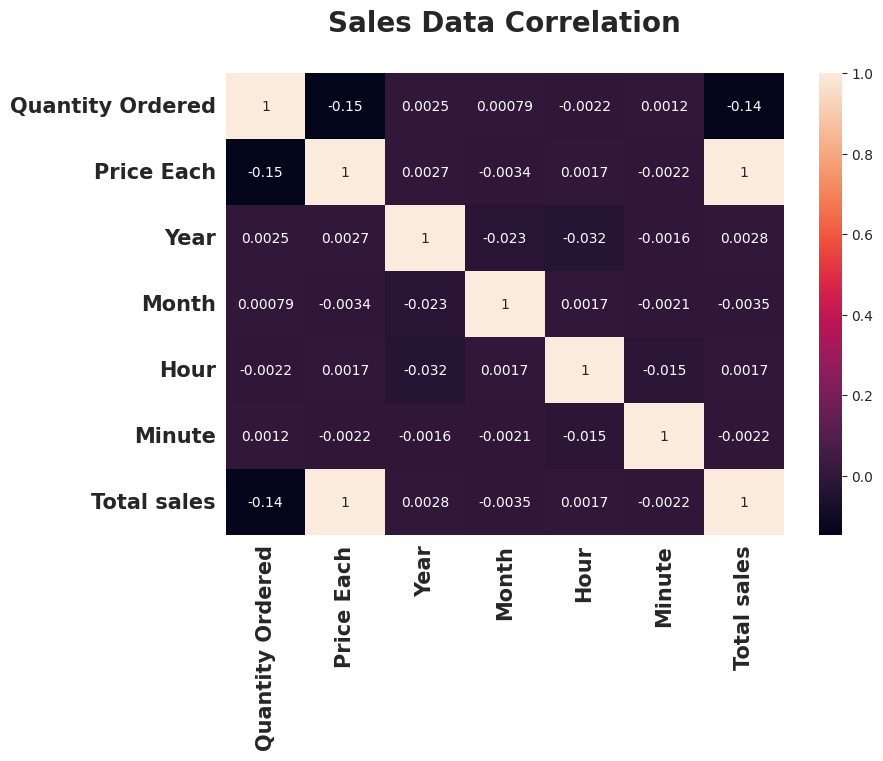

In [227]:
sns.set_style("whitegrid") # set the seaborn style

# make correlation
plt.figure(figsize=(9, 6)) # figure the size
sns.heatmap(sales_data.corr(numeric_only=True), annot=True)
plt.title("Sales Data Correlation", weight="bold", fontsize=20, pad=30) # title
plt.xticks(weight="bold", fontsize=15) # x-ticks
plt.yticks(weight="bold", fontsize=15); # y-ticks

## **See Sales Data Corelation**

In [228]:
# see Correlation between 'sales_data'
(sales_data.corr(numeric_only=True)['Total sales']
  .sort_values(ascending=True)
  .to_frame()
  .T)


,Quantity Ordered,Month,Minute,Hour,Year,Price Each,Total sales
Total sales,-0.139417,-0.003466,-0.002162,0.001668,0.002824,0.999203,1.0


In [229]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, title1, title2):

    #To create two subplots (two graphs) in one figure.
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, # set the number of column(subplots) to 2.
        nrows=1, # set the number of rows (subplots) to 1.
        figsize=(20, 6) # set the width and high
    )

    #Distribution plot (distplot) used to analyze data distribution
    sns.distplot( # create a distplot visualization
        data, #Data to be analyzed.
        ax=ax1, #The plot will be placed in ax1, the second subplot already created.
        kde=True,
        color=color
    )


   #To give a title to the first subplot (distplot).
    ax1.set_title( # set the title 1
        title1, #Title that will show
        weight="bold", #Set title bold weight
        fontsize=25, # Set font-size
        pad=30 #Set padding
    )

    #compare the data distribution with theoretical distributions such as the norm distribution
    qqplot(
        data,  #Data to be analyzed.
        ax=ax2, #The plot will be placed in ax2, the second subplot already created.
        line='s' #'s' = straightline

    )

    #To give a title to the second subplot (qqplot).
    ax2.set_title( # set the title 2
        title2,
        weight="bold", #Set title bold weight
        fontsize=25,  #Set font-size
        pad=30 #Setpadding
    )

    return fig # returning the figure


# **Quantity Ordered Distribution**

<ipython-input-229-53678edb6788>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( # create a distplot visualization


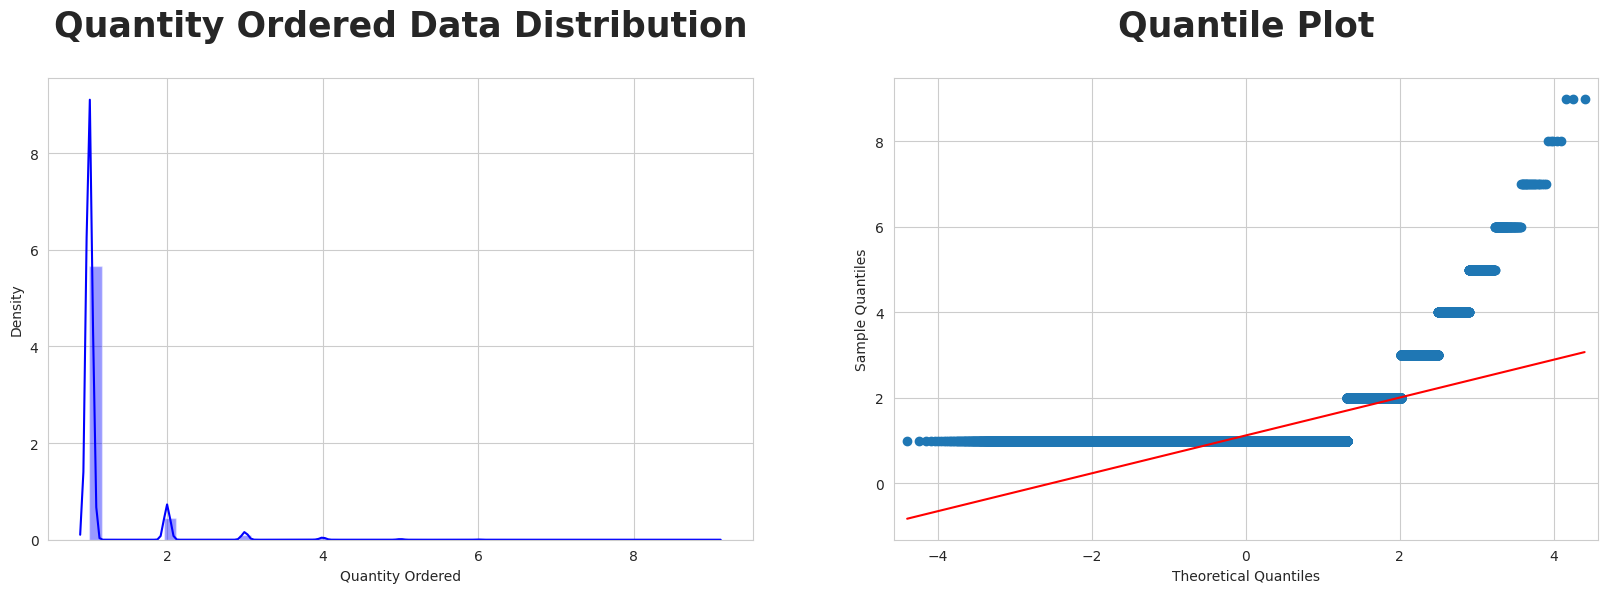

In [230]:
# call the univariate_analysis() function
univariate_analysis(
    data=sales_data['Quantity Ordered'], # put the data
    color='Blue', # pick the color
    title1='Quantity Ordered Data Distribution', # title1
    title2='Quantile Plot' # title2
);

From this graph, it can be seen that on average customers more often buy just 1 product, but there are also customers who buy 2 or 4 products at once. More than that is very rare

### **Quantity Ordered**
Quantity Ordered:
μ=1.12 dan σ=0.44

* mean ( μ )
* standard deviation ( σ )

Calculation:

1.12−2(0.44)=0.2

1.12+2(0.44)=2

### **Quantity Ordered**
Quantity Ordered:
μ=1.12 dan σ=0.44

* mean ( μ )
* standard deviation ( σ )

Calculation:

1.12−2(0.44)=0.2

1.12+2(0.44)=2

the majority of the US Sales Data Quantity Ordered population has an Quantity Ordered  range of 0−2 items/products.

# **Price Each Distribution**

<ipython-input-229-53678edb6788>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( # create a distplot visualization


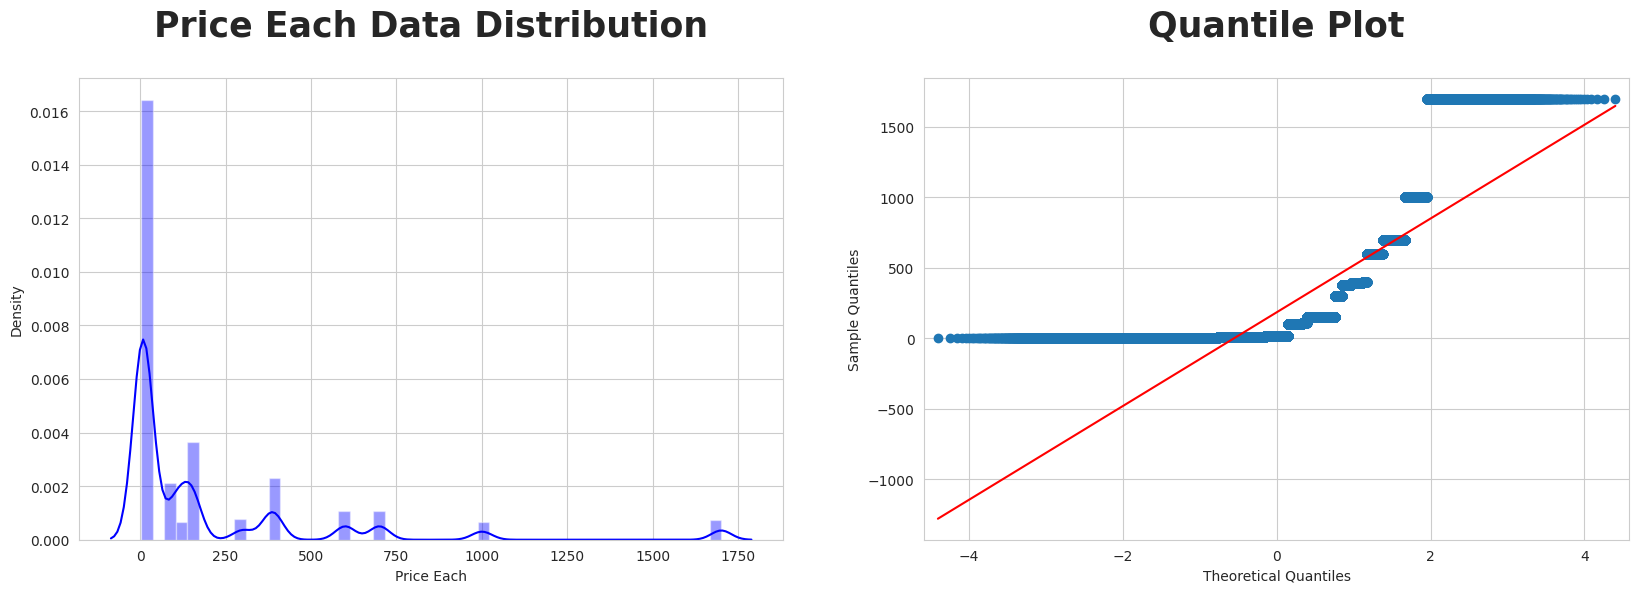

In [231]:
# call the univariate_analysis() function
univariate_analysis(
    data=sales_data['Price Each'], # put the data
    color='Blue', # pick the color
    title1='Price Each Data Distribution', # title1
    title2='Quantile Plot' # title2
);

### **Price Each**
Price Each:
μ=184.3 dan σ=332.7

* mean ( μ )
* standard deviation ( σ )

Calculation:

184.3 - 2(332.7) = -481

184.3 + 2(332.7) = 849.7

the majority of population Sales Price data for each item/product in the USA has a price range for each item/product from  0−849.7  (USD).

# **Total Sales Distribution**

<ipython-input-229-53678edb6788>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( # create a distplot visualization


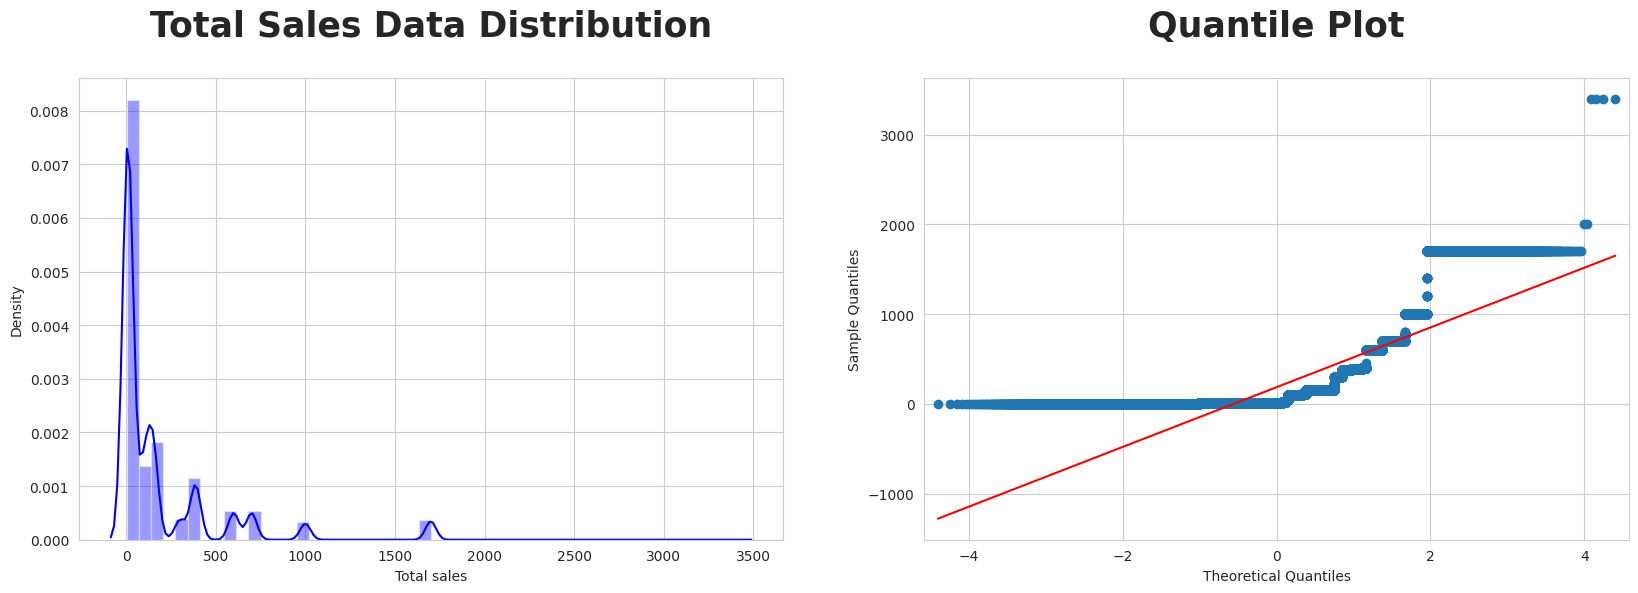

In [232]:
# Call the univariate_analysis() function
univariate_analysis(
    data=sales_data['Total sales'], # put the data
    color='Blue', # pick the color
    title1='Total Sales Data Distribution', # title1
    title2='Quantile Plot' # title2
);

### **Total Sales**
Price Each:
μ=185.4 dan σ=332.9

* mean ( μ )
* standard deviation ( σ )

Calculation:

185.4−2(332.9)=−480

185.4+2(332.9)=851.19

the majority of population Total Sales Data customers in USA have Sales range from  0−851.19(USD).

### **See Best year for sale (Higest total sale)**

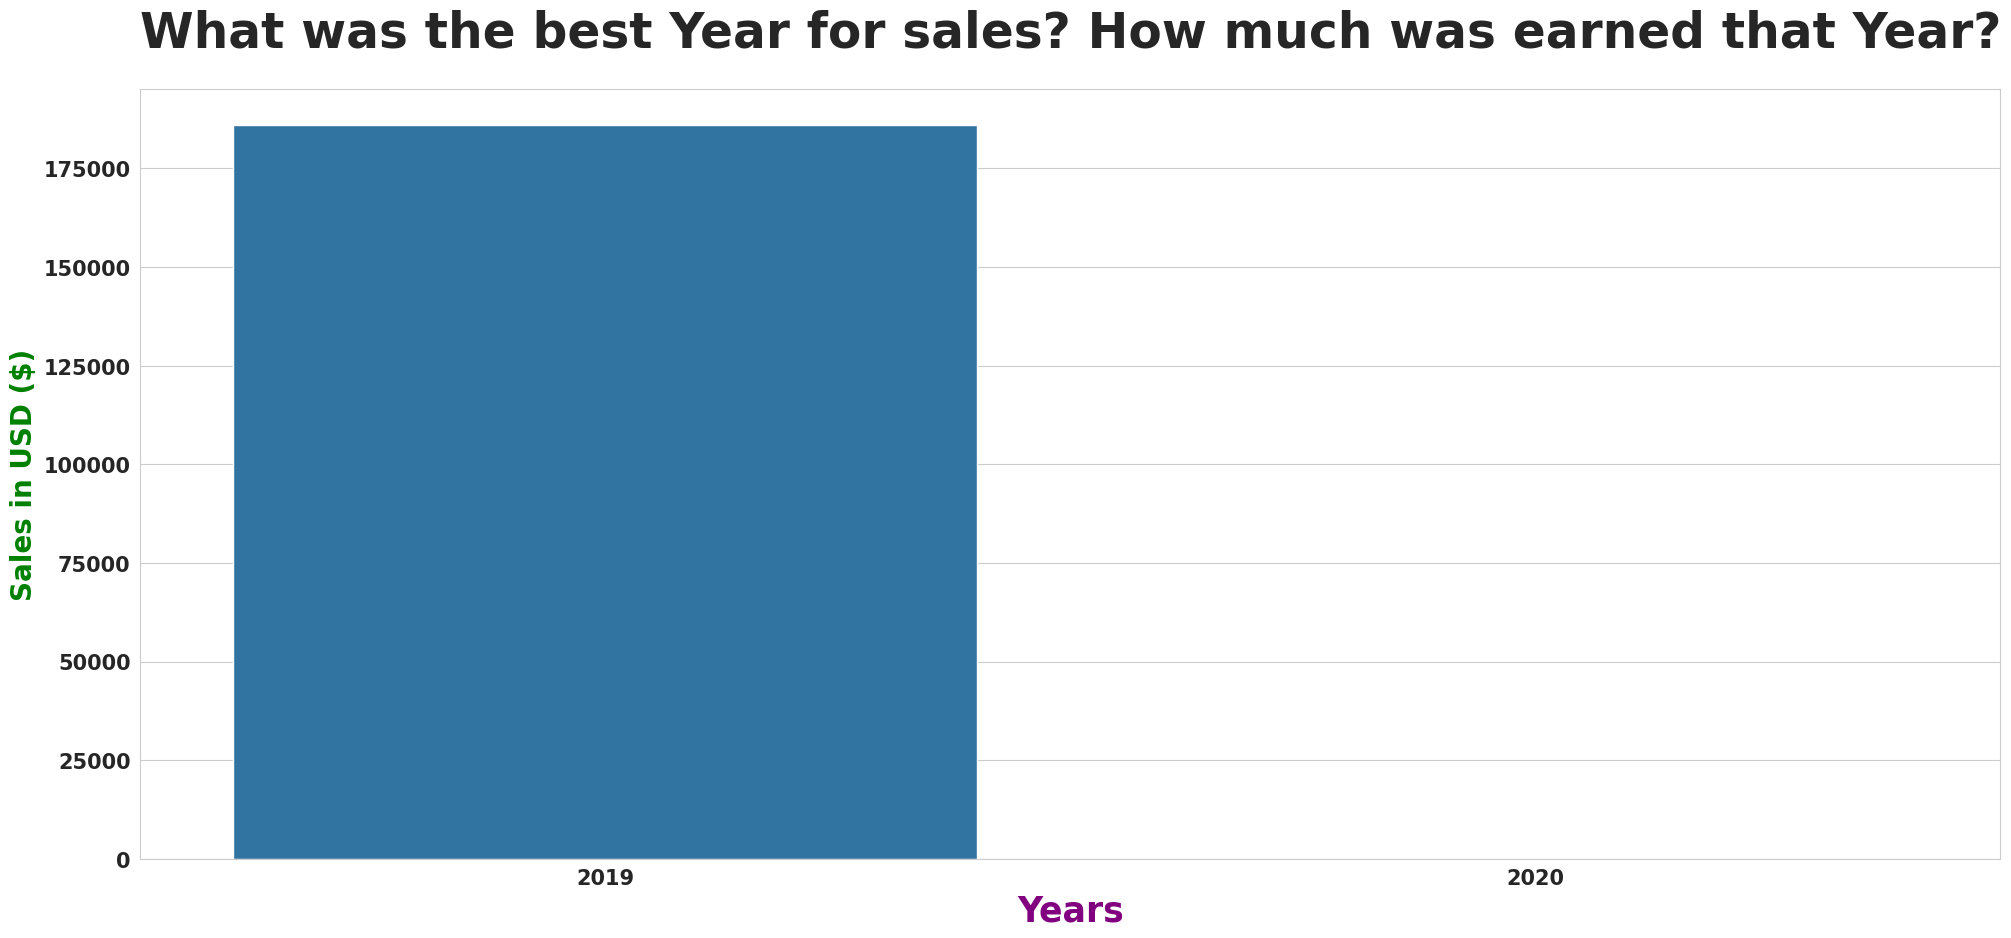

In [233]:

plt.figure(figsize=(24, 10)) # figuring the size
# makes count plot
sns.countplot(
    x="Year",
    data=sales_data
)
plt.title( # title
    "What was the best Year for sales? How much was earned that Year?",
    weight="bold", # weiqht
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Years",
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in USD ($)",
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

*2019* is the best year which has the highest number of sales compared to *2020*. This is due to the lack of data in *2020* which causes data imbalance.

### **See the highest total sales based on Sales Month **

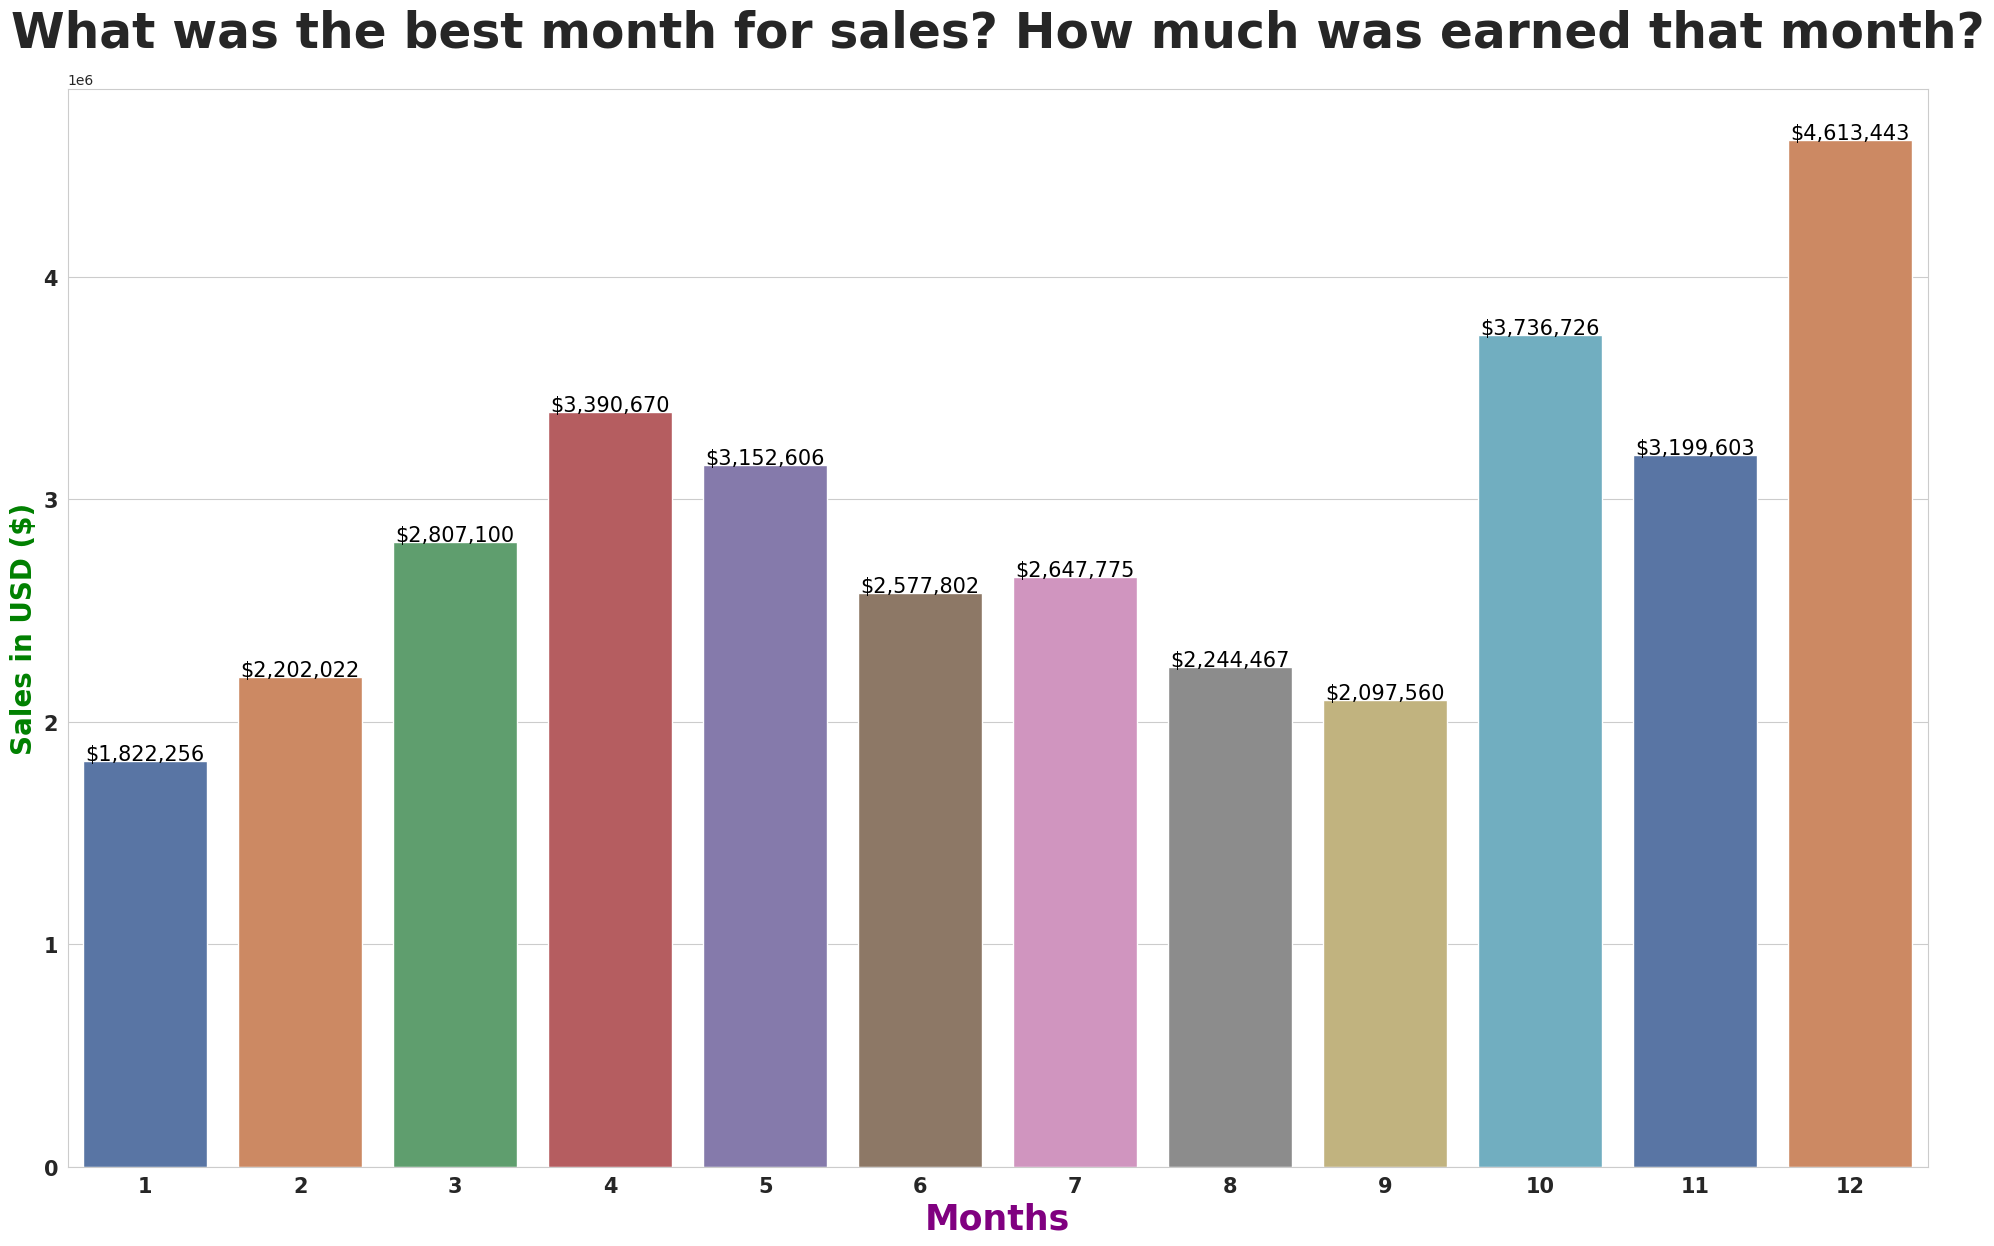

In [234]:

# "Group by" based on Month
sum_of_month_and_earned = sales_data.groupby('Month').sum(numeric_only=True).astype('int')

# Plot
plt.figure(figsize=(24, 14))  # figuring the size

# Bar Plot
ax = sns.barplot(
    x=sum_of_month_and_earned.index,  # x-axis
    y=sum_of_month_and_earned["Total sales"],  # y-axis
    data=sum_of_month_and_earned,  # data
    palette="deep"  # palette
)

# Add Title to Graph
plt.title(
    "What was the best month for sales? How much was earned that month?",
    weight="bold",  # weight
    fontsize=35,  # font-size
    pad=30  # padding
)

# x-label (title for x)
plt.xlabel(
    "Months",
    weight="bold",  # weight
    color="purple",  # color
    fontsize=25,  # font-size
    loc="center"  # location
)

plt.xticks(
    weight="bold",  # weight
    fontsize=15  # font-size
)

# y-label (title for y)
plt.ylabel(
    "Sales in USD ($)",
    weight="bold",  # weight
    color="green",  # color
    fontsize=20  # font-size
)

plt.yticks(
    weight="bold",  # weight
    fontsize=15  # font-size
)

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f"${int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=15, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


We can se that December have highes Total Sales data ($4,613,443). And September had the smallest sales data of (2.097.560)

### **See the highest total sales based on cities**

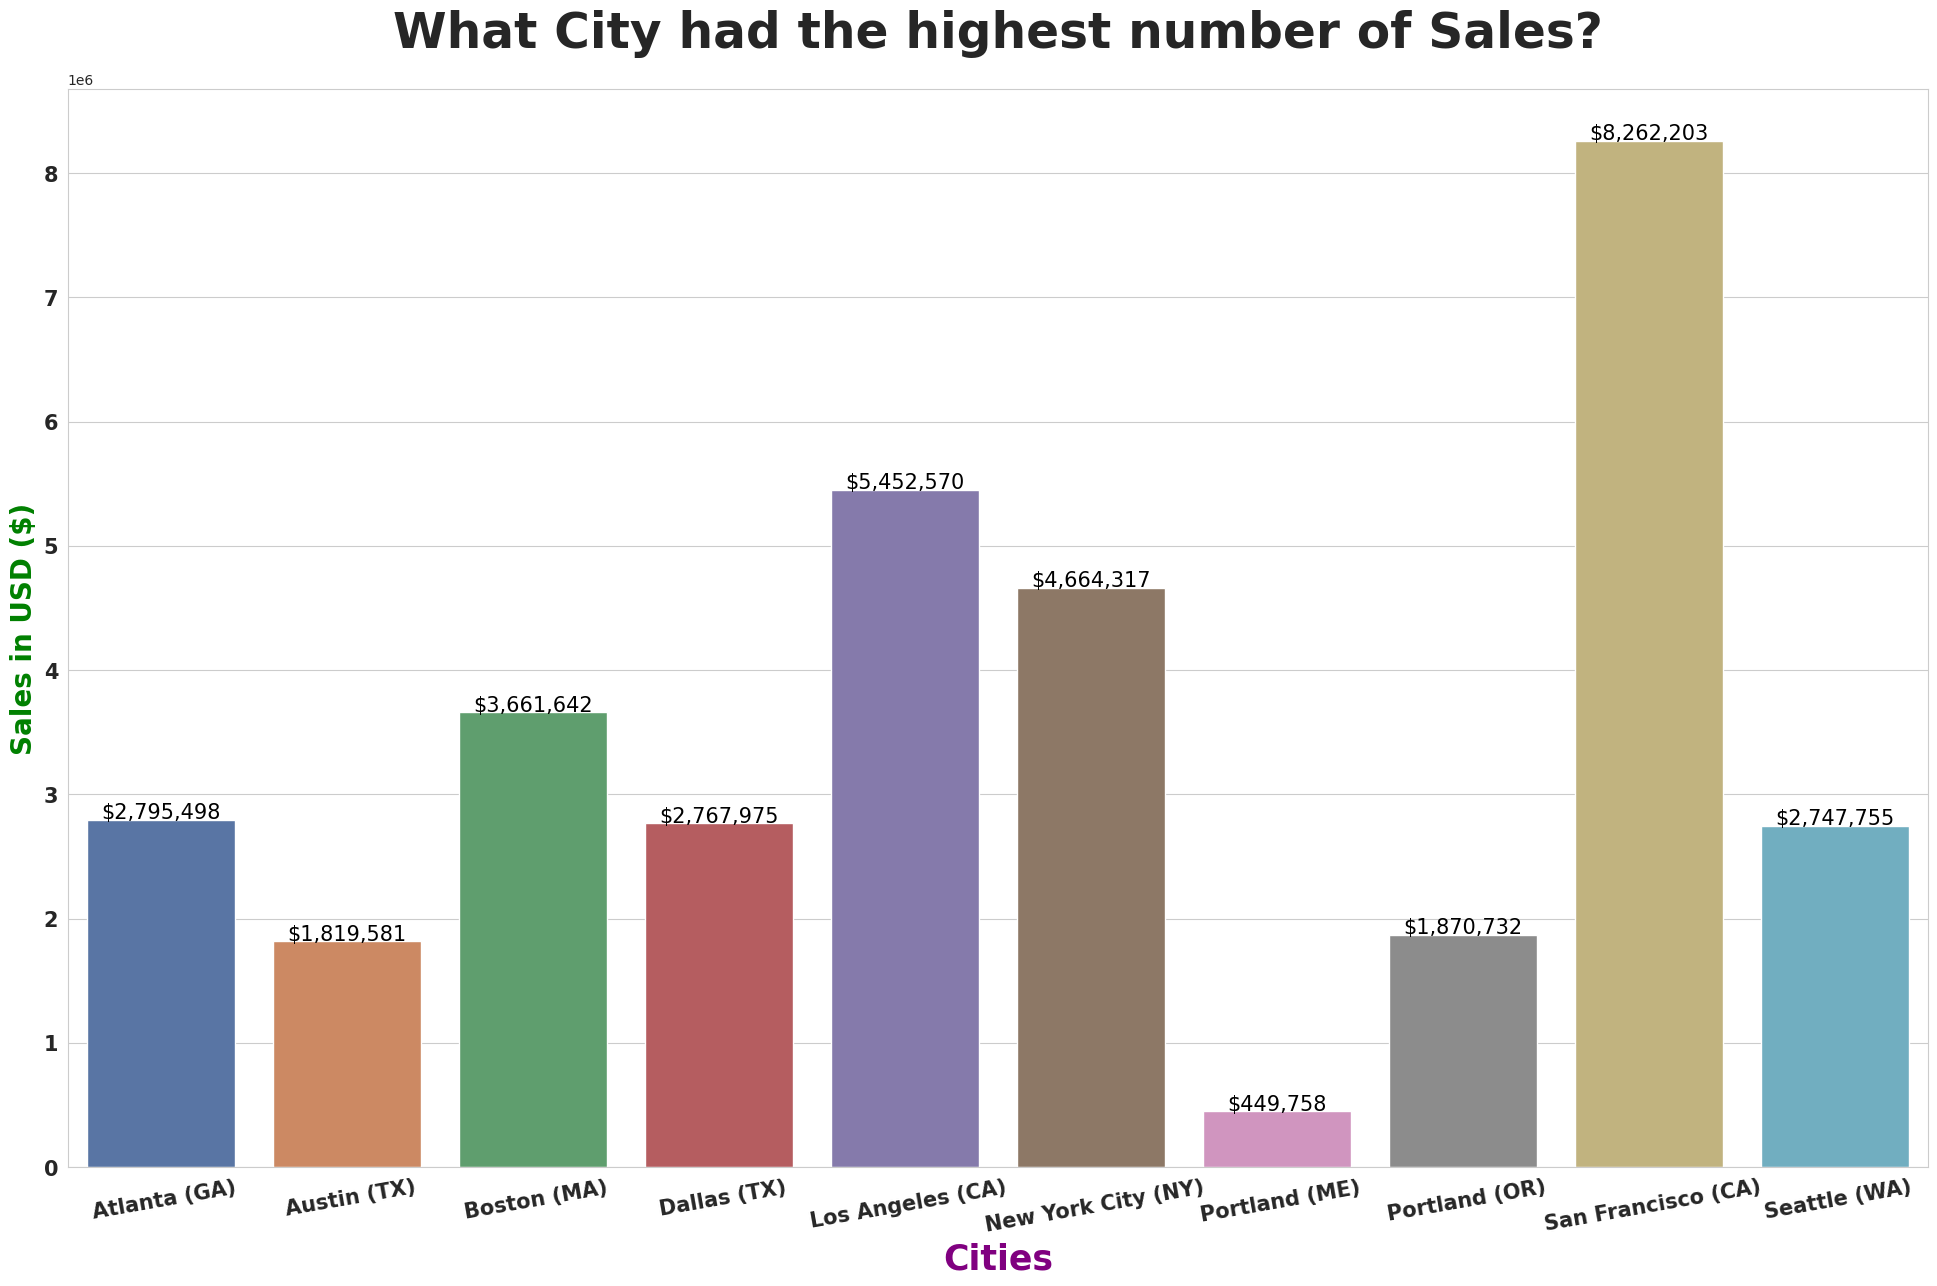

In [235]:
# "Group by" based oncities
highest_number_of_sales = sales_data.groupby('Cities').sum(numeric_only=True).astype('int')


# plot it
plt.figure(figsize=(24, 14)) # figuring the size

# Bar Plot
ax = sns.barplot(
    x=highest_number_of_sales.index,  # x-axis
    y=highest_number_of_sales["Total sales"],  # y-axis
    data=highest_number_of_sales,  # data
    palette="deep"  # palette
)

plt.title( # title
    "What City had the highest number of Sales?",
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Cities",
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=10
)
plt.ylabel( # y-label
    "Sales in USD ($)",
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f"${int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=15, color='black', xytext=(0, 5),
                textcoords='offset points')

> The city that has the most sales data in the above visualization is San Francisco, with total sales reaching $\$8,262,203$. The minimum cities that had a smallest total sales is Portland(ME) of $449,748

### **See the highest total sales based on hour**

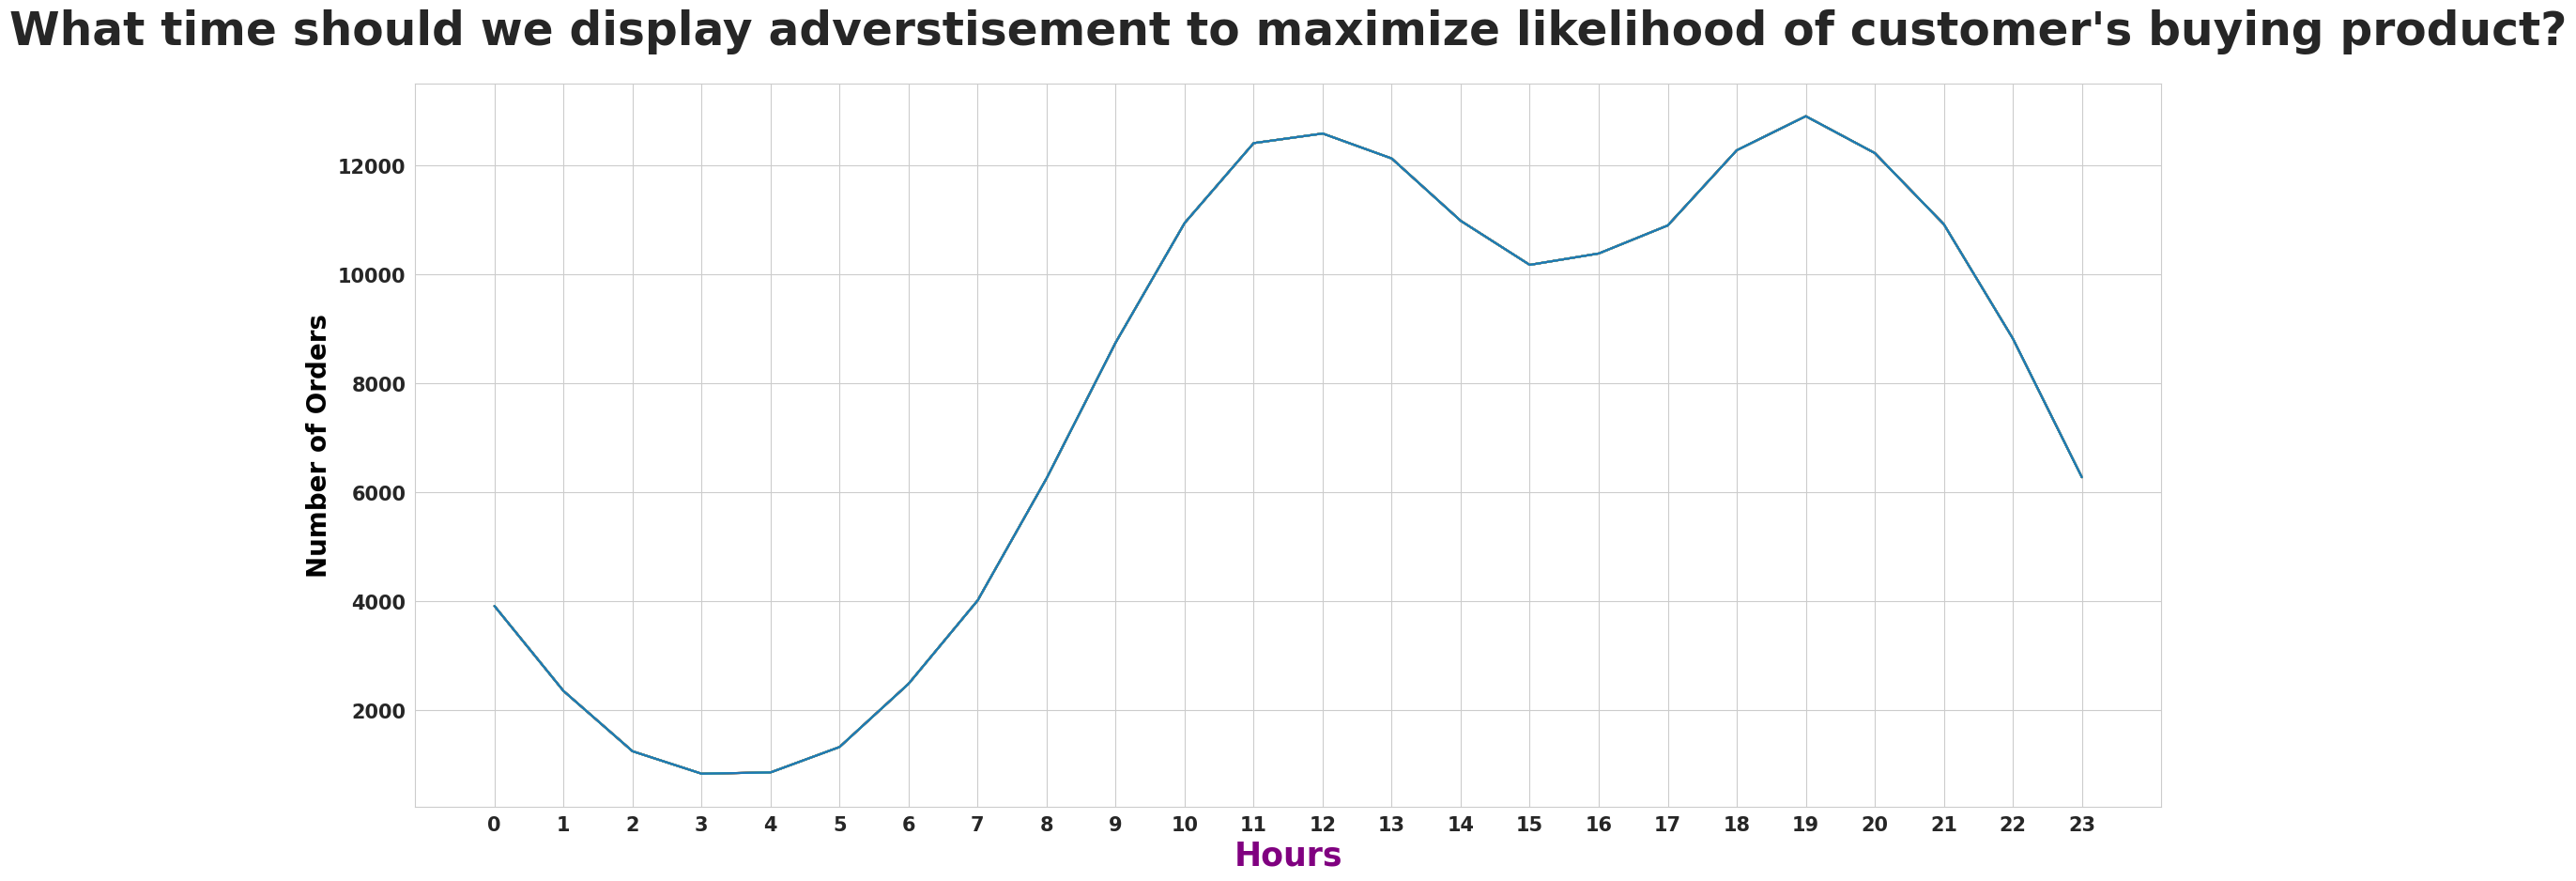

In [236]:
# Group By based on Hour
hours = [hour for hour, df in sales_data.groupby('Hour')]

#  Plotting
plt.figure(figsize=(24, 10)) # figuring the size

# makes bar plot
plt.plot( # plot
    hours, # x-axis
    sales_data.groupby(['Hour']).count() # data
)

# let's add grid
plt.grid(True)
plt.title( # title
    "What time should we display adverstisement to maximize likelihood of customer's buying product?",
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30
)
plt.xlabel( # x-label
    "Hours",
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
    loc="center" # location
)
plt.xticks( # x-ticks
    ticks=hours, # labels
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Number of Orders",
    weight="bold", # weight
    color="black", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

If you want to use advertising for promotion, in my opinion it is better to place it at 9 or 10 am. This is because there is a quite significant increase at that hour

In [237]:
from itertools import combinations
from collections import Counter

### **See which products are sold the most simultaneously**

In [238]:
# drop it using duplicated() funct

data = sales_data[sales_data['Order ID'].duplicated(keep=False)]

# create a new column,
data = sales_data.copy()
data['Grouped'] = data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# let's make a new variable, and drop duplicate data (only unique data remains)
data = data[['Order ID', 'Grouped']].drop_duplicates()

# create a new variable for Counter
count = Counter()

# make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# and make another for loop
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


The products that were sold the most simultaneously were iPhones and Lightning Charging Cables with a total of 1005

### **See which product sold the most?**

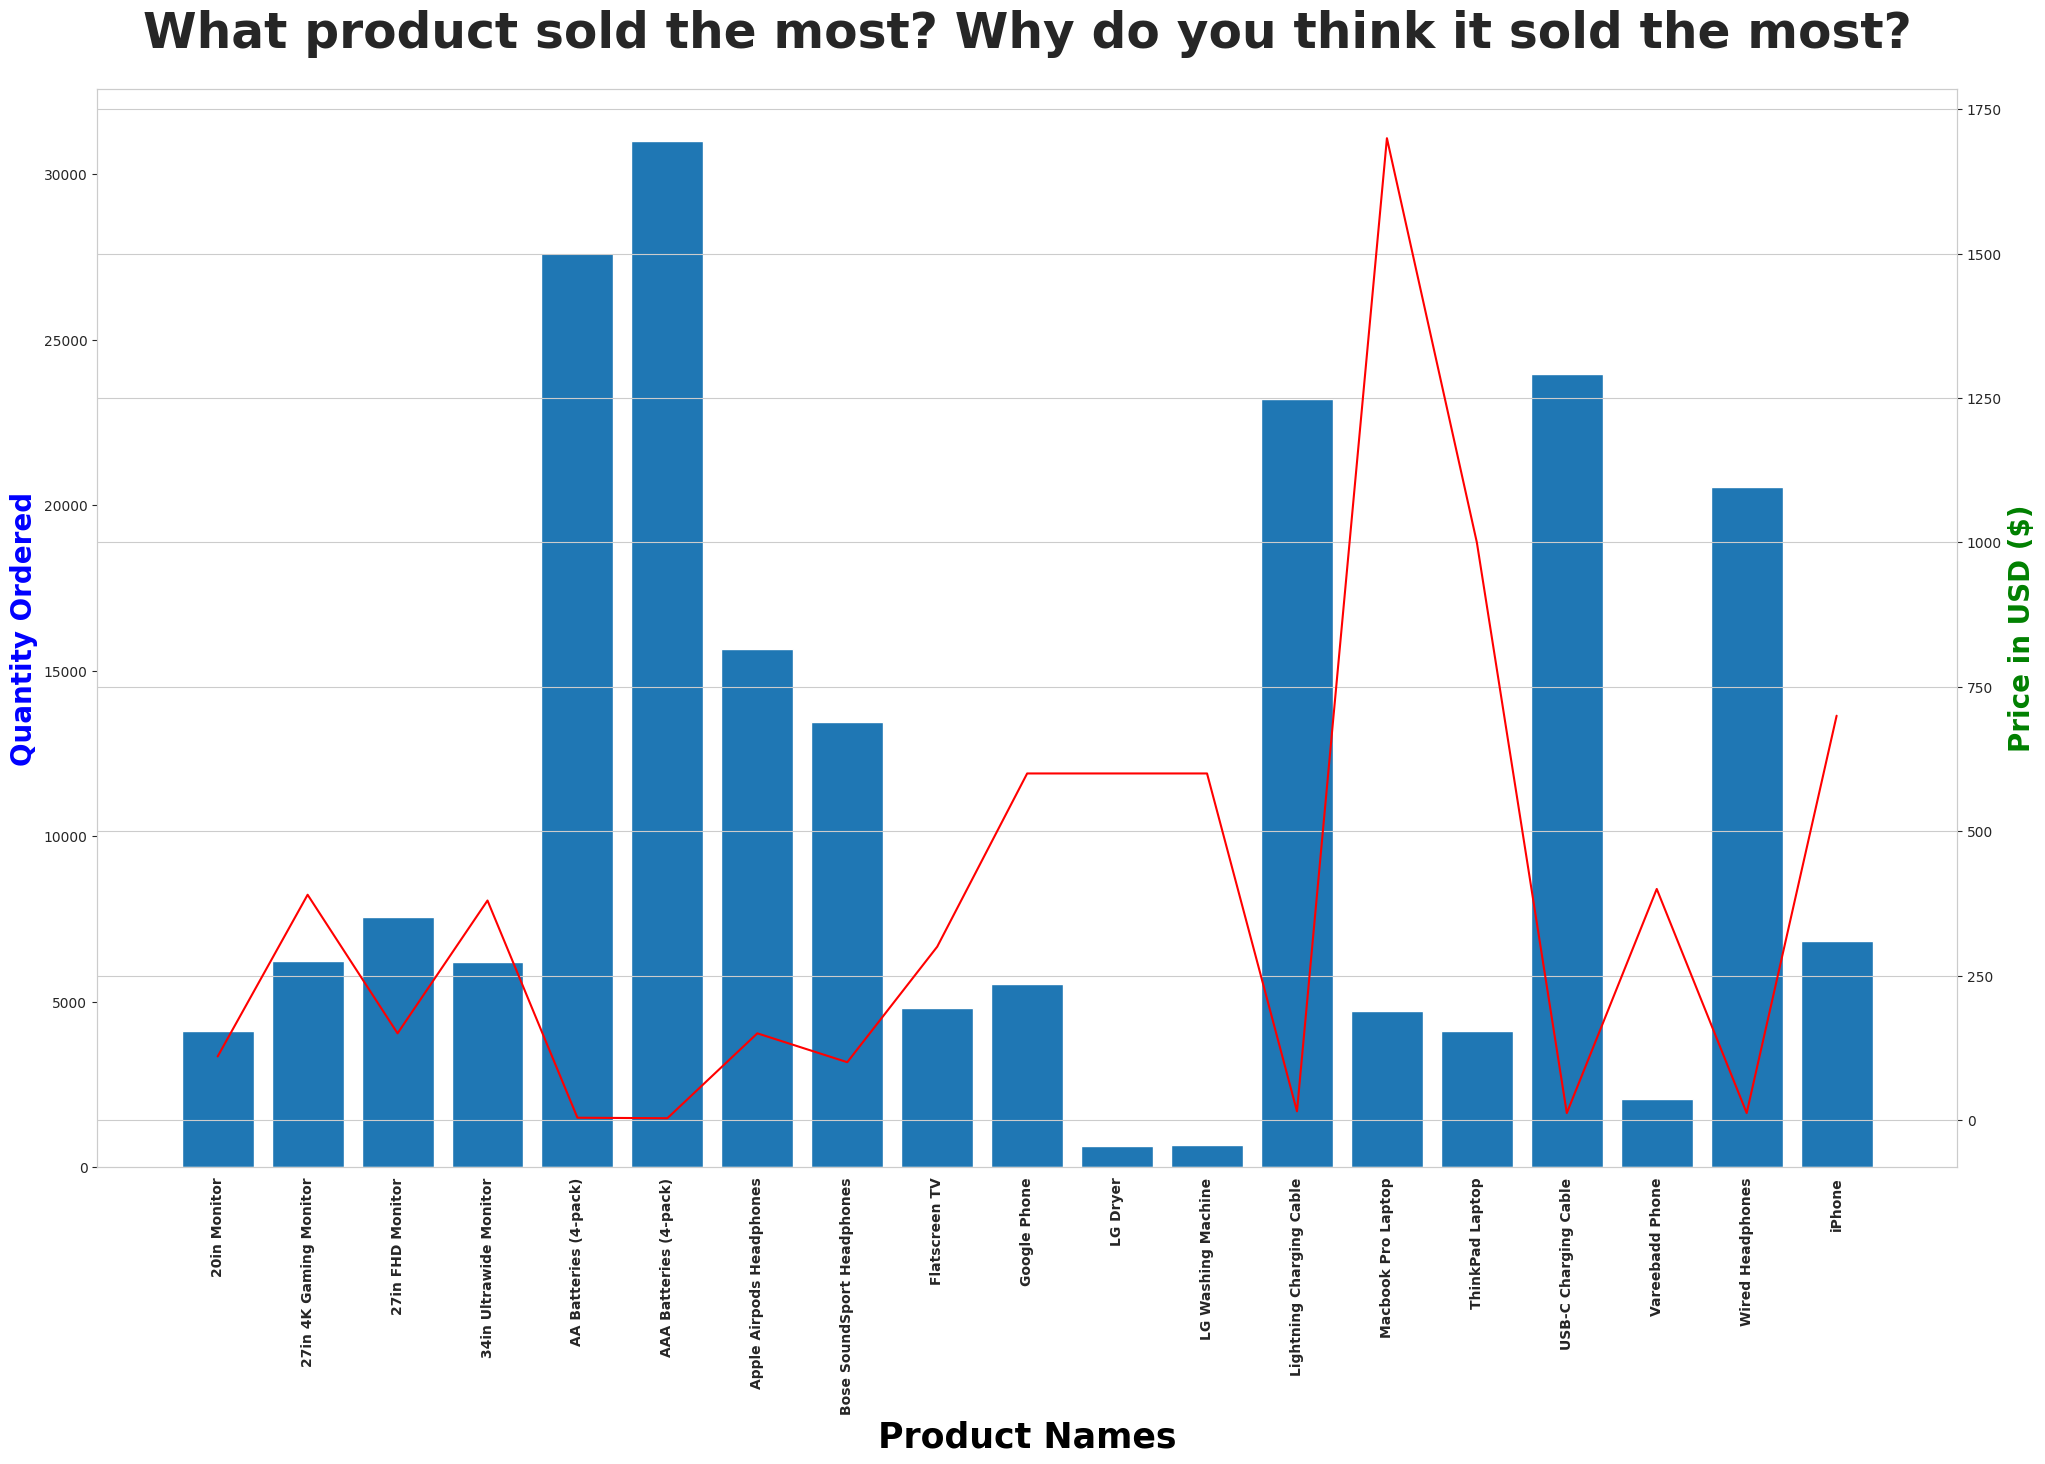

In [239]:
# let's prepare the variables for the plotting
# group the product
product_group = sales_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()
prices = product_group['Price Each'].mean()
products = [product for product, df in product_group]

"""Visualization"""
# let's make subplots
fig, ax1 = plt.subplots(figsize=(24, 14))
ax2 = ax1.twinx()

# AXES 1
ax1.bar(products, quantity_ordered)
ax1.set_title(
    "What product sold the most? Why do you think it sold the most?",
    weight="bold",
    fontsize=35,
    pad=30
)
ax1.set_xlabel(
    "Product Names",
    weight="bold",
    fontsize=25,
    color="black"
)
ax1.set_ylabel(
    "Quantity Ordered",
    color="blue",
    fontsize=20,
    weight="bold"
)

ax1.set_xticks(
    range(len(products))
)

ax1.set_xticklabels(products, rotation="vertical", weight="bold")



# Disable grid lines
ax1.grid(False)

# AXES 2
sns.lineplot(x=products, y=prices, color="red")
ax2.set_ylabel(
    "Price in USD ($)",
    color="green",
    fontsize=20,
    weight="bold"
)

plt.show()


The most sold products are AA Batteries (4-pack), AA Batteries (4-pack), Lightning Charging Cable, USB-C Charging Cable, and Wired Headphones.

This is because the prices of the most ordered products have a low price compared to other products, for example, the LG Dryer, or the LG Washing Machine, which have a price of around  $500−700 .

In [240]:
def statistical_probability(frequency, total_frequency):
    return frequency / total_frequency

product = sales_data.Product.value_counts().sum()

### **Probability for next people will order iPhone?**

In [241]:
iphone = sales_data[sales_data.Product == 'iPhone'].value_counts().sum()

# Calculating for iPhone Probability
P_iphone = statistical_probability(iphone, product)
Pprime_iphone = 1 - P_iphone
print('Probability for next people will order iPhone: %.2f%%' % P_iphone)
print('Probability for next people will not order iPhone: %.2f%%' % Pprime_iphone)

Probability for next people will order iPhone: 0.04%
Probability for next people will not order iPhone: 0.96%


### **Probability for next people will order AA Batteries (4-pack)?**

In [242]:
AABatteries = sales_data[sales_data.Product == 'AA Batteries (4-pack)'].value_counts().sum()

# Calculating for iPhone Probability
P_batteries= statistical_probability(AABatteries, product)
Pprime_batteries = 1 - P_batteries
print('Probability for next people will order AA Batteries (4-pack): %.2f%%' % P_batteries)
print('Probability for next people will not order AA Batteries (4-pack): %.2f%%' % Pprime_batteries)

Probability for next people will order AA Batteries (4-pack): 0.11%
Probability for next people will not order AA Batteries (4-pack): 0.89%


### **Probability for next people will order USB-C Charging Cable**

In [243]:
usb_charging = sales_data[sales_data.Product == 'USB-C Charging Cable'].value_counts().sum()

# Calculating for iPhone Probability
P_USB = statistical_probability(usb_charging, product)
Pprime_USB = 1 - P_USB
print('Probability for next people will order USB-C Charging Cable: %.2f%%' % P_USB)
print('Probability for next people will not order USB-C Charging Cable: %.2f%%' % Pprime_USB)

Probability for next people will order USB-C Charging Cable: 0.12%
Probability for next people will not order USB-C Charging Cable: 0.88%
